In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
df=pd.read_csv("FuelConsumption.csv")

In [3]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [4]:
cdf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

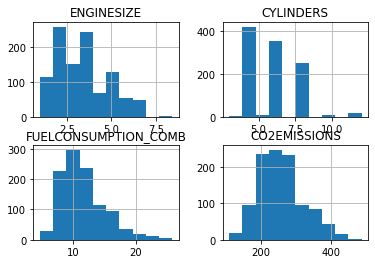

In [5]:
cdf.hist()
plt.show()

In [6]:
msk=np.random.rand(len(df))<0.8

train=cdf[msk]
test=cdf[~msk]

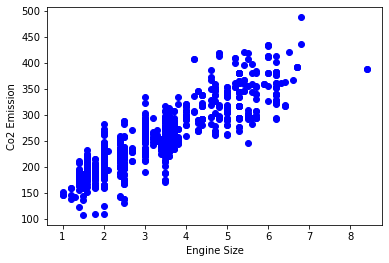

In [12]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

In [8]:
from sklearn import linear_model
regr=linear_model.LinearRegression()

train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

regr.fit(train_x,train_y)

print("Coefficient: ",regr.coef_)

print("Intercept: ",regr.intercept_)

Coefficient:  [[39.59013382]]
Intercept:  [124.29101524]


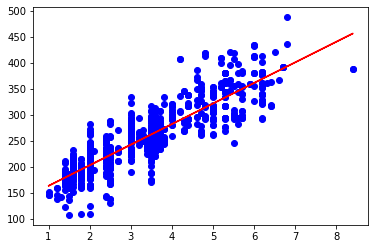

In [9]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")

plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0], color="red")

plt.show()


In [10]:
from sklearn.metrics import *
test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])

test_y_hat=regr.predict(test_x)

print("Mean Absolute Error: %.2f "%np.mean(np.absolute(test_y_hat-test_y)))
print("Mean Squared Error: %.2f"%np.mean((test_y_hat-test_y)**2))

print("Accuracy: %.2f"%(r2_score(test_y_hat,test_y)*100))


Mean Absolute Error: 23.50 
Mean Squared Error: 950.47
Accuracy: 69.40


# PREDICTING

In [13]:
pred=regr.predict([[6]])
print("prediction: %.2f"%pred[0][0])

prediction: 361.83
